Week2 HW 
2015122022 김윤환

LAB


In [0]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt

In [0]:
N= 50
v1,v2,v3,v4,v5,v6 = np.random.randn(N*6).reshape(6,-1)


In [81]:
v1.shape

(50,)

In [0]:
X=pd.DataFrame(np.c_[v1,v2,v3]) #np_c:1차원 배열을 칼럼으로 세로로 붙이기
X.columns = ['v1','v2','v3']
Y= (10 -5*v1 +4*v2 + 3*v4+ 7* v5 + 1*v1**2 + 0.2 * v2**2 + 0.5 * v1*v2 + 0.5* v6**3 + np.random.randn(N)*1.5)
Y=pd.DataFrame(Y)

In [0]:
#Train_Test split
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

X_train_sc.reset_index(drop=True, inplace=True)
X_test_sc.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [0]:
#Feature Extraction
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [85]:
poly = PolynomialFeatures(degree=2)
Phi_train= poly.fit_transform(X_train_sc)
Phi_test = poly.fit_transform(X_test_sc)
print(Phi_train.shape)
print(Phi_test.shape)

(35, 10)
(15, 10)


In [0]:
#Ridge Regresion
from sklearn.linear_model import Ridge

alphas = np.logspace(-6,6,500) #logspace = linspace log version

In [0]:
def Ridge_Reg(Phi_train,Y_train,Phi_test,Y_test,alphas, fig=False):
    reg = Ridge()

    coefs=[]
    train_MSE=[]
    test_MSE=[]

    for a in alphas:
        reg.set_params(alpha=a)
        reg.fit(Phi_train,Y_train)
        coefs.append(reg.coef_)
        
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train,train_pred))

        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))

    if fig == True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}                                   

Weight: [[ 0.    -3.023  5.211 -2.038  1.978  4.917 -0.351  0.663 -3.286 -0.259]]


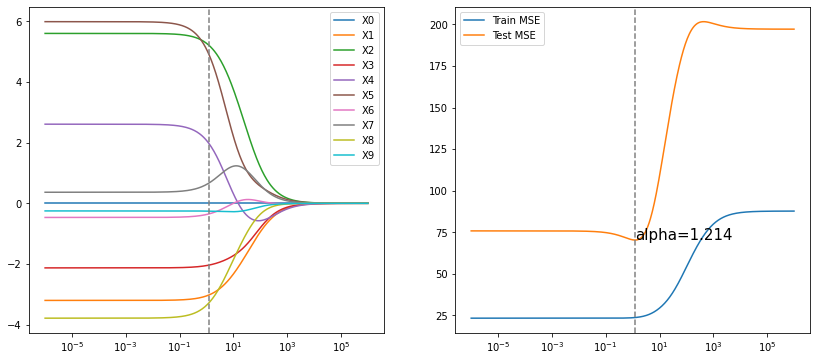

In [88]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

In [0]:
#LASSO 
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

In [0]:
def Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -2.959  5.25  -1.974  1.886  4.837 -0.152  0.498 -3.161 -0.258]


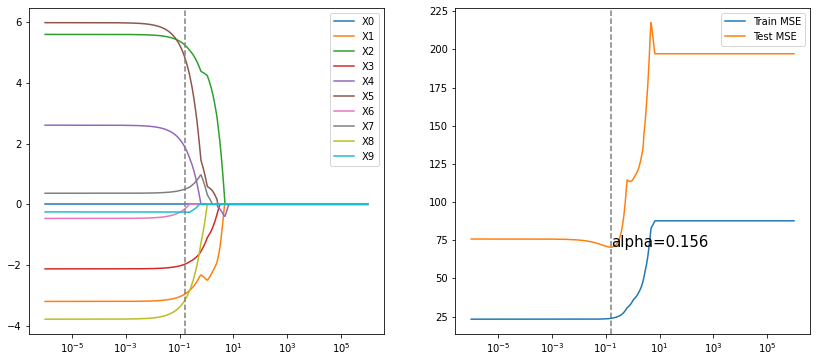

In [91]:
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

In [92]:
#K-fold CV For lambda
import numpy as np
from sklearn.model_selection import KFold

kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_Ridge = np.zeros((kcv.get_n_splits(), alphas.size))
kcvMSE_Lasso = np.zeros((kcv.get_n_splits(), alphas.size))

i = 0
for train_index, test_index in kcv.split(Phi_train, Y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    CV_Phi_train, CV_Phi_test = Phi_train[train_index,:], Phi_train[test_index,:]
    CV_Y_train, CV_Y_test = Y_train.iloc[train_index,:], Y_train.iloc[test_index,:]
    
    Ridge_output = Ridge_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Ridge[i, :] = Ridge_output['test_MSE']
    
    Lasso_output = Lasso_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Lasso[i, :] = Lasso_output['test_MSE']
    i += 1

TRAIN: [ 2  3  4  5  7  9 10 11 12 13 14 15 16 17 19 22 23 24 25 26 27 28 29 30
 31 32 33 34] TEST: [ 0  1  6  8 18 20 21]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 13 14 15 16 18 20 21 22 23 26 27 28 29
 30 31 32 33] TEST: [ 7 12 17 19 24 25 34]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 12 14 15 16 17 18 19 20 21 24 25 26 27 28
 29 32 33 34] TEST: [10 11 13 22 23 30 31]
TRAIN: [ 0  1  2  3  5  6  7  8 10 11 12 13 16 17 18 19 20 21 22 23 24 25 28 29
 30 31 32 34] TEST: [ 4  9 14 15 26 27 33]
TRAIN: [ 0  1  4  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27
 30 31 33 34] TEST: [ 2  3  5 16 28 29 32]


Weight: [[ 0.    -2.484  4.55  -2.722  1.574  2.626 -1.347  1.31  -2.253  0.476]]


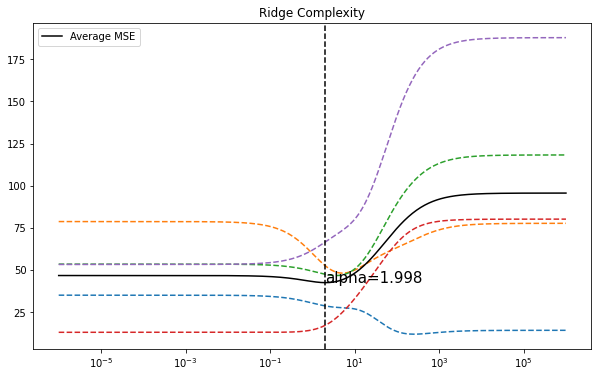

In [93]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Ridge.T)
ax.plot(alphas, kcvMSE_Ridge.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Ridge Complexity')
ax.legend()

coefs = Ridge_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])

Weight: [ 0.    -2.601  4.679 -2.588  1.265  2.963 -0.848  0.91  -2.138  0.16 ]


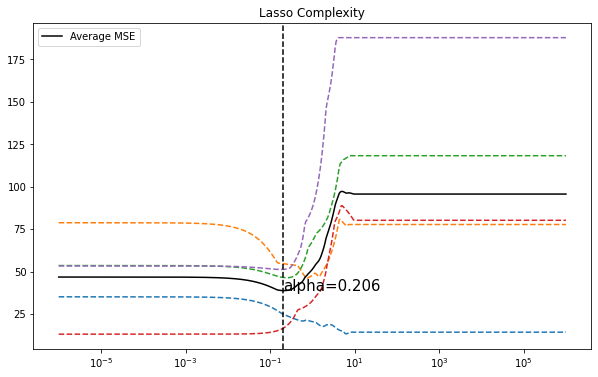

In [94]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Lasso.T)
ax.plot(alphas, kcvMSE_Lasso.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Lasso Complexity')
ax.legend()

coefs = Lasso_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])

real data

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
# Importing the dataset
real = pd.read_csv('/content/drive/My Drive/ESC20-1/real.csv',index_col=0)
real.columns= ['date','house_age','dist_mrt','con_store','lat','long','price']
real.head()

,date,house_age,dist_mrt,con_store,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1


In [130]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       414 non-null    float64
 1   house_age  414 non-null    float64
 2   dist_mrt   414 non-null    float64
 3   con_store  414 non-null    int64  
 4   lat        414 non-null    float64
 5   long       414 non-null    float64
 6   price      414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [131]:
real.sort_values(by=['price'], inplace=True)
real.reset_index(inplace=True)
real = real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,con_store,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
409,2012.833,0.0,292.998,6,24.977,121.545,71.0
410,2013.417,0.0,292.998,6,24.977,121.545,73.6
411,2013.583,35.4,318.529,9,24.971,121.541,78.0
412,2013.333,37.2,186.510,9,24.977,121.543,78.3


In [0]:
import seaborn as sns

In [133]:
real.describe()

,date,house_age,dist_mrt,con_store,lat,long,price
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


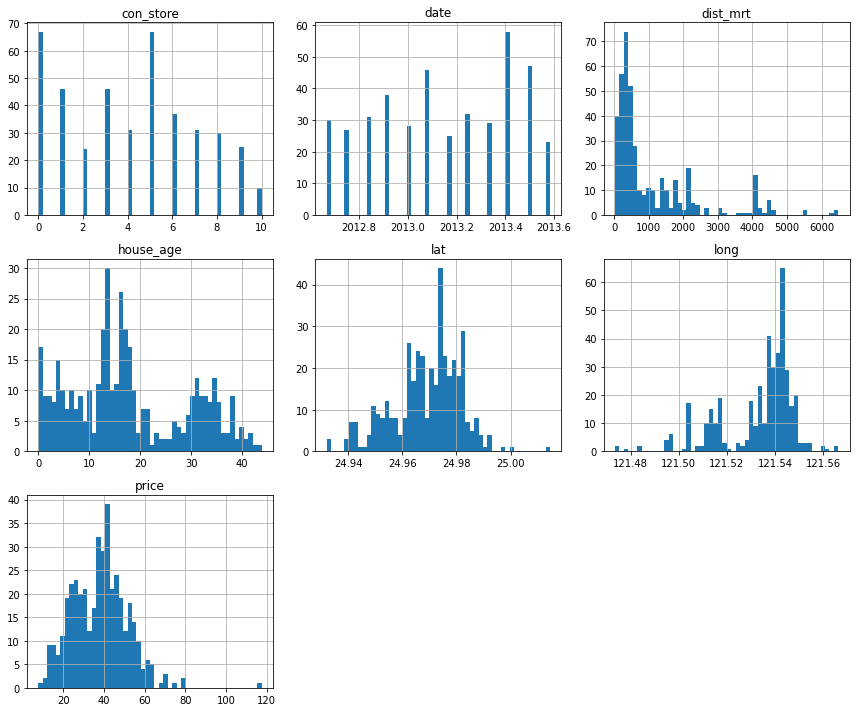

In [134]:
real.hist(bins=50, figsize=(12, 10))
plt.tight_layout()

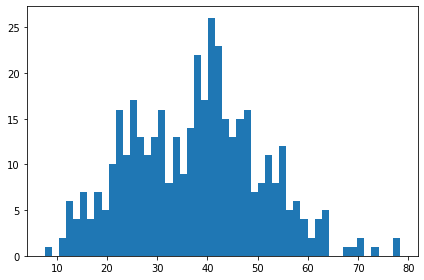

In [135]:
real = real[real.price < 80] 
plt.hist(real.price, bins=50)
plt.tight_layout()

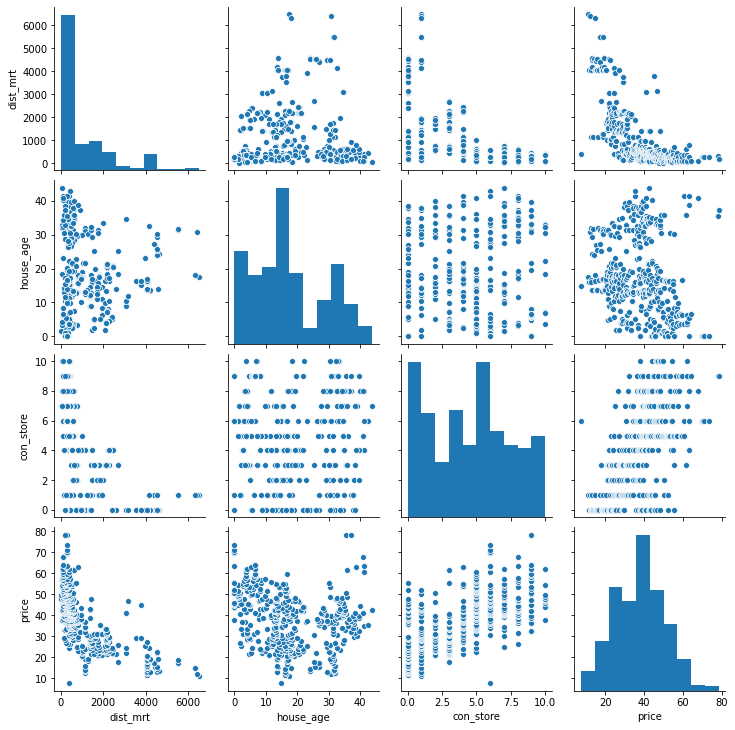

In [136]:
sns.pairplot(real[['dist_mrt', 'house_age', 'con_store', 'price']])

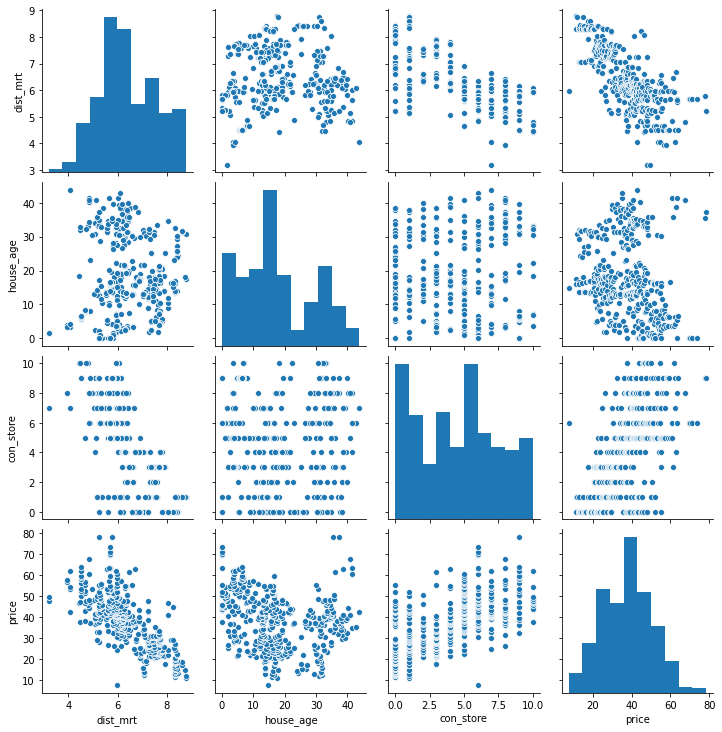

In [138]:
real2 = real.copy()
real2['dist_mrt'] = np.log(1+real.dist_mrt) #bell shape
sns.pairplot(real2[['dist_mrt', 'house_age','con_store','price']])

In [0]:
data=real2[['dist_mrt','house_age','price']]

X=real2[['dist_mrt','house_age']]
Y=real2['price']

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=77)

In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

def Scl_train(sclr, df):
    colnames = df.columns
    df = sclr.transform(df)
    df = pd.DataFrame(df)
    df.set_axis(colnames, axis=1, inplace=True)
    return df

In [108]:
X_train_sc = Scl_train(scaler, X_train)
X_train_sc.describe()

,dist_mrt,house_age
count,2.890e+02,2.890e+02
mean,2.777e-16,-3.073e-17
std,1.002e+00,1.002e+00
min,-2.793e+00,-1.472e+00
25%,-6.124e-01,-8.033e-01
50%,-1.458e-01,-1.182e-01
75%,8.253e-01,9.594e-01
max,2.123e+00,2.187e+00


In [142]:
X_test_sc = Scl_train(scaler, X_test)
X_test_sc.describe()

,dist_mrt,house_age
count,124.000,124.000
mean,0.089,0.032
std,0.941,0.830
min,-2.150,-1.380
25%,-0.497,-0.459
50%,-0.146,-0.135
75%,0.779,0.769
max,1.806,1.803


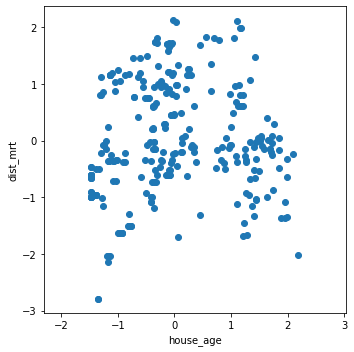

In [143]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train_sc.house_age, X_train_sc.dist_mrt)
ax.set_xlabel('house_age')
ax.set_ylabel('dist_mrt')
ax.axis('equal')
fig.tight_layout()

In [144]:

import plotly.express as px
fig = px.scatter_3d(x=X_train_sc.dist_mrt, y=X_train_sc.house_age, z=Y_train)
fig.update_traces(marker=dict(size=4,
                              line=dict(width=0.1,
                                        color='red')))
fig.show()

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px

def Poly_Reg(X_train, Y_train, X_test, Y_test, m):
    # Feature Extraction
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # LR Fitting
    lin = LinearRegression(fit_intercept=False)
    lin.fit(X_train_poly, Y_train)
    Y_train_pred = lin.predict(X_train_poly)
    Y_test_pred = lin.predict(X_test_poly)

    # Compue MSE
    train_MSE = np.sqrt(np.linalg.norm(Y_train - Y_train_pred)**2/Y_train.shape[0])
    test_MSE = np.sqrt(np.linalg.norm(Y_test - Y_test_pred)**2/Y_test.shape[0])

    # Residual
    Resid = Y_train - Y_train_pred

    return {'coef': lin.coef_, 'train_MSE': train_MSE, 'test_MSE': test_MSE, 'Resid': Resid}

PRmodel = Poly_Reg(X_train_sc,Y_train,X_test_sc,Y_test,2)
PRmodel
fig = px.scatter_3d(x=X_train_sc.dist_mrt, y=X_train_sc.house_age, z=PRmodel['Resid'])
fig.update_traces(marker=dict(size=4,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')))

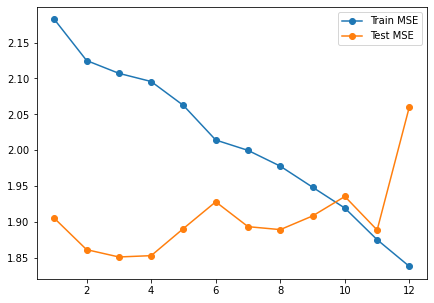

In [146]:
output = pd.DataFrame(columns=['d','Train MSE','Test MSE'])
for i in np.arange(12):
    m = i+1
    Reg = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, m)
    output.loc[i] = [m, Reg['train_MSE'], Reg['test_MSE']]


fig, ax = plt.subplots(figsize=(7,5))
ax.plot(output['d'], np.log(output['Train MSE']), 'o-', label='Train MSE')
ax.plot(output['d'], np.log(output['Test MSE']), 'o-', label='Test MSE')

ax.legend()

In [148]:
poly = PolynomialFeatures(degree=2)
phi_train = poly.fit_transform(X_train_sc)
phi_test = poly.fit_transform(X_test_sc)
print(phi_train.shape)
print(phi_test.shape)

(289, 6)
(124, 6)


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)
def Ridge_Reg(phi_train, Y_train, phi_test, Y_test, alphas, fig=False):
    
    ## How to Ridge?##
    #1. Call Ridge function as an object
    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
   
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(phi_train.shape[1])]
        for i in range(phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -8.66  -3.368 -1.776  0.026  2.301]


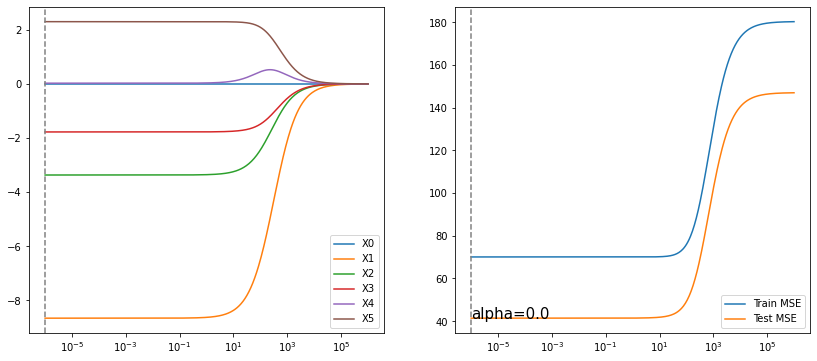

In [158]:
Ridge_output = Ridge_Reg(phi_train, Y_train, phi_test, Y_test, alphas, fig=True)

In [0]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

In [0]:
def Lasso_Reg(phi_train, Y_train, phi_test, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(phi_train.shape[1])]
        for i in range(phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -8.66  -3.368 -1.776  0.026  2.301]


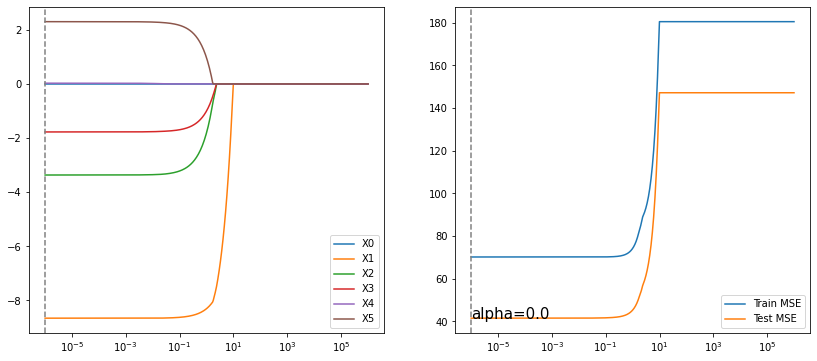

In [160]:
Lasso_output = Lasso_Reg(phi_train, Y_train, phi_test, Y_test, alphas, fig=True)

In [161]:
from sklearn.model_selection import KFold

kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_Ridge = np.zeros((kcv.get_n_splits(), alphas.size))
kcvMSE_Lasso = np.zeros((kcv.get_n_splits(), alphas.size))

i = 0
for train_index, test_index in kcv.split(phi_train, Y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    CV_phi_train, CV_phi_test = phi_train[train_index,:], phi_train[test_index,:]
    CV_Y_train, CV_Y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    Ridge_output = Ridge_Reg(CV_phi_train, CV_Y_train, CV_phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Ridge[i, :] = Ridge_output['test_MSE']
    
    Lasso_output = Lasso_Reg(CV_phi_train, CV_Y_train, CV_phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Lasso[i, :] = Lasso_output['test_MSE']
    i += 1

TRAIN: [  1   2   3   4   5   6   7   8   9  10  12  13  15  16  17  18  19  20
  22  23  24  25  26  27  28  29  30  32  34  37  38  40  41  42  43  44
  45  46  48  49  50  51  52  53  54  55  56  57  58  60  61  63  64  65
  66  67  68  70  71  74  76  77  78  79  80  81  82  84  85  86  87  88
  89  90  91  92  93  96  97  98  99 100 101 102 103 104 105 106 108 109
 110 111 112 113 114 115 116 117 119 120 121 122 125 127 129 130 131 132
 133 134 135 136 140 141 142 143 145 146 147 148 149 153 154 155 156 157
 159 161 162 163 165 166 167 168 170 171 172 173 174 177 178 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 197 198 199 201 202 204
 205 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 226 228 229 230 231 232 233 234 235 237 238 239 241 242 243 244 245 246
 247 249 250 251 252 253 254 256 258 259 260 261 262 263 264 266 269 270
 271 272 273 274 275 276 278 279 281 282 283 284 285 287 288] TEST: [  0  11  14  21  31  33  35  36  39  47  59  62 

Weight: [ 0.    -8.735 -2.906 -1.918 -0.207  1.859]


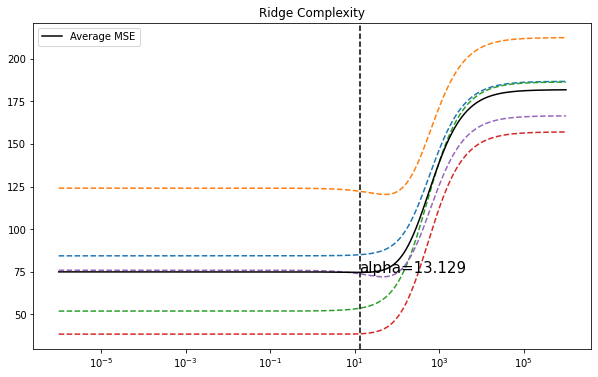

In [162]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Ridge.T)
ax.plot(alphas, kcvMSE_Ridge.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Ridge Complexity')
ax.legend()

coefs = Ridge_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Ridge_alphas = [alphas[np.argmin(meanMSE)]]

Weight: [ 0.    -9.115 -2.636 -1.881 -0.018  1.567]


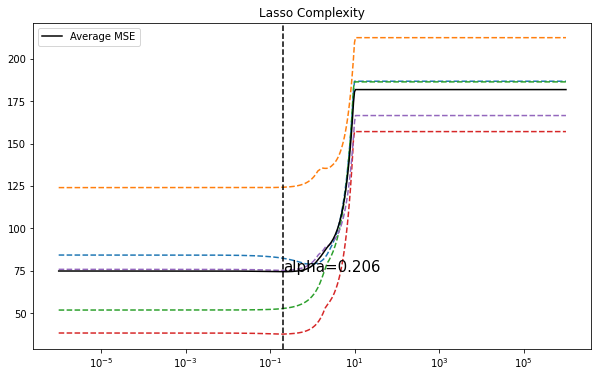

In [163]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Lasso.T)
ax.plot(alphas, kcvMSE_Lasso.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Lasso Complexity')
ax.legend()

coefs = Lasso_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Lasso_alphas = [alphas[np.argmin(meanMSE)]]